In [43]:
import pandas as pd
import seaborn as sns
import numpy as np

In [44]:
file_natural = pd.read_csv('results/natural/natural_imagebind_afforded.csv')
file_natural = file_natural.drop(columns=['Unnamed: 0'])

file_synthetic = pd.read_csv('results/synthetic/synthetic_imagebind_afforded.csv')
file_synthetic = file_synthetic.drop(columns=['Unnamed: 0'])

In [51]:
def pivot_fmp(df, ex_im):
    indexed = df[df['prompt_type']==ex_im]
    pivoted = indexed.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
    diff = pivoted.assign(diff = abs(pivoted['afforded'] - pivoted['non_afforded']), new_id = np.arange(18))

    return diff

def plot_fmp(df, ex_im, na_sy):
    plot = sns.catplot(data = df,
                       x = "new_id",
                       y = "diff",
                       kind='bar',
                       height= 3,
                       aspect=1.5,
                       palette= ['C0','C3'],
                       alpha= 0.8).set(title = f'Abs difference for {ex_im} {na_sy} data')
    return plot


In [54]:
diff_ex_natural = pivot_fmp(file_natural, 'explicit')
diff_im_natural = pivot_fmp(file_natural, 'implicit')
diff_ex_synthetic = pivot_fmp(file_synthetic, 'explicit')
diff_im_synthetic = pivot_fmp(file_synthetic, 'implicit')

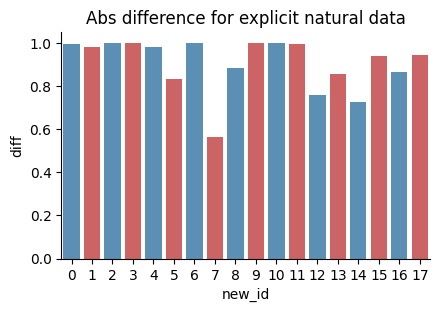

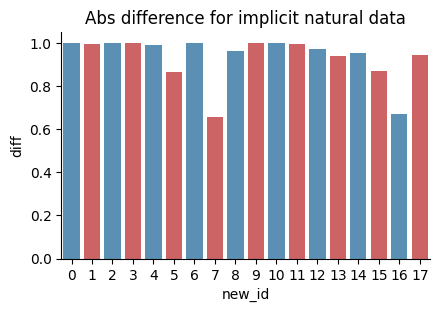

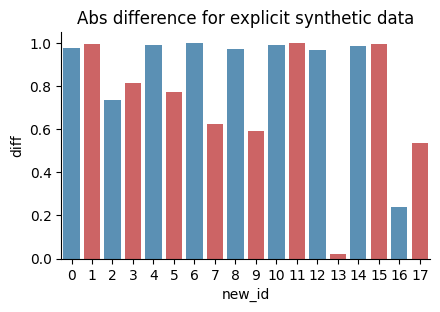

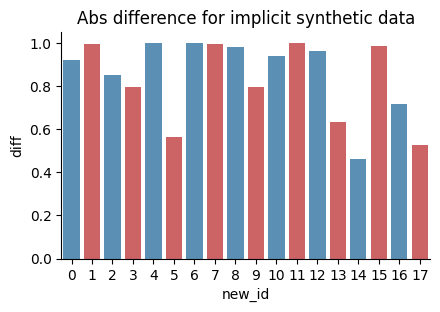

In [55]:
plot_fmp(diff_ex_natural, 'explicit', 'natural')
plot_fmp(diff_im_natural, 'implicit', 'natural')
plot_fmp(diff_ex_synthetic, 'explicit', 'synthetic')
plot_fmp(diff_im_synthetic, 'implicit', 'synthetic')